# Prediccion de diversas cripto monedas

## Introduccion 
Para este trabajo prediciremos BTC. Para lo anterior se utilizara Arima con Rolling, Sarima y VAR (con metodos de machine learning) y con las criptomonedas (Ethereum, BNB, Solana y XRP).
Importamos las librerias principales y los datos desde yahoo finance.

## Modelos machine  learning con **VAR**

El Modelo **VAR** signfica vector autoregression y tiene dos supuestos: estacionaridad y ser 2 o mas series de tiempo.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="husl")

In [21]:
ETH = yf.Ticker("ETH-USD")
BNB = yf.Ticker("BNB-USD")
SOL = yf.Ticker("SOL-USD")
BTC = yf.Ticker("BTC-USD")
XRP = yf.Ticker("XRP-USD")

In [22]:
from yahoo_fin.stock_info import get_data
from datetime import datetime, timedelta
stock = 'ETH-USD'
resolution = '1d'
end_date = datetime.now()
start_date = end_date - timedelta(days=800)

def date_format(date_h):
    return date_h.strftime('%d/%m/%Y')

ETH_USD_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
ETH_USD_df['date'] = pd.to_datetime(ETH_USD_df['date'], '%Y-%m-%d')
ETH_USD_df.index = ETH_USD_df['date']
ETH_USD_df.head()

,date,open,high,low,close,adjclose,volume,ticker
date,,,,,,,,
2022-03-30,2022-03-30,3401.526123,3435.286133,3349.237061,3385.157959,3385.157959,15302506131,ETH-USD
2022-03-31,2022-03-31,3385.289307,3435.128418,3272.934570,3281.642822,3281.642822,17685495686,ETH-USD
2022-04-01,2022-04-01,3282.576172,3467.555908,3223.891357,3449.552246,3449.552246,20982988937,ETH-USD
2022-04-02,2022-04-02,3449.788574,3521.284668,3442.000244,3445.059326,3445.059326,23571556215,ETH-USD
2022-04-03,2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,3522.833496,15333808649,ETH-USD


In [23]:
stock = 'BNB-USD'
BNB_USD_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
BNB_USD_df['date'] = pd.to_datetime(BNB_USD_df['date'], '%Y-%m-%d')
BNB_USD_df.index = BNB_USD_df['date']
BNB_USD_df.head()

,date,open,high,low,close,adjclose,volume,ticker
date,,,,,,,,
2022-03-30,2022-03-30,434.429718,448.947174,427.692078,442.684845,442.684845,2181737151,BNB-USD
2022-03-31,2022-03-31,442.658875,451.961090,424.950287,428.916107,428.916107,2632534284,BNB-USD
2022-04-01,2022-04-01,429.124023,446.796539,414.749390,446.604279,446.604279,2718206274,BNB-USD
2022-04-02,2022-04-02,446.844208,453.558472,436.776703,436.955353,436.955353,2272901729,BNB-USD
2022-04-03,2022-04-03,436.865814,455.228455,432.821716,450.348877,450.348877,2128734028,BNB-USD


In [24]:
stock = 'SOL-USD'
SOL_USD_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
SOL_USD_df['date'] = pd.to_datetime(SOL_USD_df['date'], '%Y-%m-%d')
SOL_USD_df.index = SOL_USD_df['date']
SOL_USD_df.head()

,date,open,high,low,close,adjclose,volume,ticker
date,,,,,,,,
2022-03-30,2022-03-30,111.690254,124.605003,107.767258,120.699486,120.699486,3908170428,SOL-USD
2022-03-31,2022-03-31,120.681557,128.930115,120.197830,122.661461,122.661461,4115229587,SOL-USD
2022-04-01,2022-04-01,122.736107,137.558411,118.787910,134.430939,134.430939,4434807484,SOL-USD
2022-04-02,2022-04-02,134.453583,143.020020,132.139191,132.198868,132.198868,3394186456,SOL-USD
2022-04-03,2022-04-03,132.241074,140.263702,131.226151,136.775330,136.775330,2585967812,SOL-USD


In [25]:
stock = 'BTC-USD'
BTC_USD_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
BTC_USD_df['date'] = pd.to_datetime(BTC_USD_df['date'], '%Y-%m-%d')
BTC_USD_df.index = BTC_USD_df['date']
BTC_USD_df.head()

,date,open,high,low,close,adjclose,volume,ticker
date,,,,,,,,
2022-03-30,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664062,47062.664062,29333883962,BTC-USD
2022-03-31,2022-03-31,47062.148438,47512.027344,45390.539062,45538.675781,45538.675781,33327427106,BTC-USD
2022-04-01,2022-04-01,45554.164062,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,BTC-USD
2022-04-02,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194,BTC-USD
2022-04-03,2022-04-03,45859.128906,47313.476562,45634.105469,46453.566406,46453.566406,25414397610,BTC-USD


In [26]:
stock = 'XRP-USD'
XRP_USD_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
XRP_USD_df['date'] = pd.to_datetime(XRP_USD_df['date'], '%Y-%m-%d')
XRP_USD_df.index = XRP_USD_df['date']
XRP_USD_df.head()

,date,open,high,low,close,adjclose,volume,ticker
date,,,,,,,,
2022-03-30,2022-03-30,0.857942,0.871279,0.849425,0.860814,0.860814,1832671641,XRP-USD
2022-03-31,2022-03-31,0.860880,0.870866,0.803881,0.814564,0.814564,2611691934,XRP-USD
2022-04-01,2022-04-01,0.814709,0.833678,0.810256,0.827740,0.827740,2091887103,XRP-USD
2022-04-02,2022-04-02,0.827735,0.848600,0.824828,0.824919,0.824919,1624227101,XRP-USD
2022-04-03,2022-04-03,0.824891,0.850154,0.817265,0.842950,0.842950,1348476817,XRP-USD


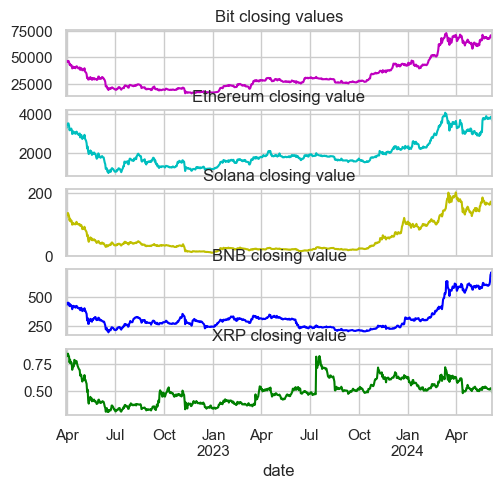

In [27]:
fig, ax= plt.subplots(5, sharex=True)
fig.set_size_inches(5.5, 5,5)
BTC_USD_df['close'].plot(ax=ax[0], color='m')
ax[0].set_title('Bit closing values');

ETH_USD_df["close"].plot(ax=ax[1], color='c')
ax[1].set_title('Ethereum closing value');

SOL_USD_df["close"].plot(ax=ax[2], color='y')
ax[2].set_title('Solana closing value');

BNB_USD_df["close"].plot(ax=ax[3], color='b')
ax[3].set_title('BNB closing value');

XRP_USD_df["close"].plot(ax=ax[4], color='g')
ax[4].set_title('XRP closing value');
    
plt.show()

Revisamos prueba dicker fuller

In [10]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(BTC_USD_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.517865
p-value: 0.985406


Nuestra serie de tiempo **BTC** no es estacionaria lo que es un requisito del modelo de  VAR (Vector autoregression). Revisamos la cuatro series de tiempo restante para aplicarle differenciacion a las que no lo sean.

In [11]:
result = adfuller(ETH_USD_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.176238
p-value: 0.683733


In [12]:
result = adfuller(BNB_USD_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.538938
p-value: 0.986010


In [13]:
result = adfuller(SOL_USD_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.433729
p-value: 0.904313


In [14]:
result = adfuller(XRP_USD_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.208630
p-value: 0.019491


Dado que ninguna de nuestras series de tiempo es estacionaria por lo que vamos a utilizar el metodo de diferenciacion para convertirlas en estacionarias.

In [59]:
BTC_USD_df["diff"]=BTC_USD_df.close.diff()
BTC_USD_df=BTC_USD_df.dropna()
result = adfuller(BTC_USD_df["diff"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.063596
p-value: 0.000000


Nuestra serie de tiempo **BTC** con una differenciacion de primer orden es estacionaria por lo que procedemos a revisar las demas series de tiempo.

In [16]:
ETH_USD_df["diff"]=ETH_USD_df.close.diff()
ETH_USD_df=ETH_USD_df.dropna()
result = adfuller(ETH_USD_df["diff"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.918640
p-value: 0.000000


Nuestra serie de tiempo **ETH** con una differenciacion de primer orden es estacionaria por lo que procedemos a revisar las demas series de tiempo.

In [17]:
BNB_USD_df["diff"]=BNB_USD_df.close.diff()
BNB_USD_df=BNB_USD_df.dropna()
result = adfuller(BNB_USD_df["diff"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.631224
p-value: 0.000001


Nuestra serie de tiempo **BNB** con una differenciacion de primer orden es estacionaria por lo que procedemos a revisar las demas series de tiempo.

In [18]:
SOL_USD_df["diff"]=SOL_USD_df.close.diff()
SOL_USD_df=SOL_USD_df.dropna()
result = adfuller(SOL_USD_df["diff"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.581384
p-value: 0.000001


Nuestra serie de tiempo **SOL** con una differenciacion de primer orden es estacionaria por lo que procedemos a revisar la ultima series de tiempo.

In [19]:
XRP_USD_df["diff"]=XRP_USD_df.close.diff()
XRP_USD_df=XRP_USD_df.dropna()
result = adfuller(XRP_USD_df["diff"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -33.450526
p-value: 0.000000


Nuestra serie de tiempo **XRP** con una differenciacion de primer orden es estacionaria.

Procedemos a descargar los modelos a revisar y convertimos nuestros datos en *Forecaster* para facilitar la predicion.

In [20]:
models = ('mlr','elasticnet','knn','gbt','xgboost','mlp')
GridGenerator.get_example_grids()
GridGenerator.get_mv_grids()
fBTC = Forecaster(
    y=BTC_USD_df['diff'],
    current_dates = BTC_USD_df['date'],
    test_length = .2,
    future_dates = 52,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
fBNB = Forecaster(
    y=BNB_USD_df['diff'],
    current_dates = BNB_USD_df['date'],
    test_length = .2,
    future_dates = 52,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
fSOL = Forecaster(
    y=SOL_USD_df['diff'],
    current_dates = SOL_USD_df['date'],
    test_length = .2,
    future_dates = 52,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
fETH = Forecaster(
    y=ETH_USD_df['diff'],
    current_dates = ETH_USD_df['date'],
    test_length = .2,
    future_dates = 52,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
fXRP = Forecaster(
    y=XRP_USD_df['diff'],
    current_dates = XRP_USD_df['date'],
    test_length = .2,
    future_dates = 52,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)

In [21]:
for f in (fBTC,fBNB,fSOL,fXRP, fETH ):
    f.auto_Xvar_select(
        estimator = 'elasticnet',
        monitor = 'ValidationMetricValue',
        irr_cycles = [4], 
        cross_validate=True,
        cvkwargs={
            'k':3,
            'test_length':13,
            'space_between_sets':4,
        }
    )

Empezamos a programar nuestro modelos para cada una de nuestras cryptomonedas y graficamos las prediccion de los modelos de machine learning para cada una de las criptomoneda

PermutationExplainer explainer: 759it [01:48,  6.59it/s]                        
PermutationExplainer explainer: 759it [00:13, 13.00it/s]                        
PermutationExplainer explainer: 759it [00:22, 18.55it/s]                        
PermutationExplainer explainer: 759it [00:23, 18.27it/s]                        


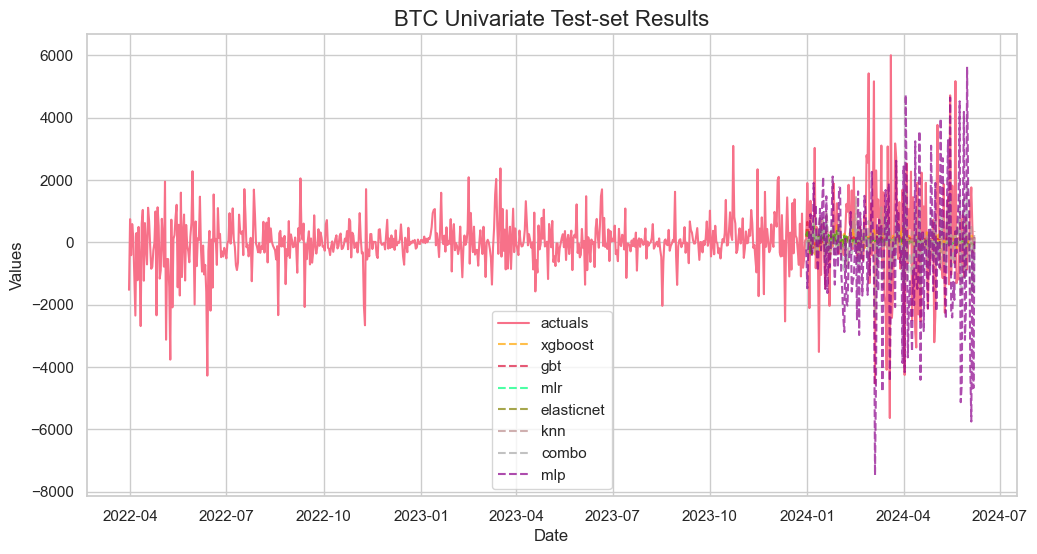

In [22]:
fBTC.tune_test_forecast(models,feature_importance=True)
best_model_con_uni = fBTC.order_fcsts()[0]
fBTC.set_estimator('combo')
fBTC.manual_forecast(how='weighted')
fBTC.plot_test_set(order_by='TestSetRMSE')
plt.title('BTC Univariate Test-set Results',size=16)
plt.show()

PermutationExplainer explainer: 686it [00:31, 14.30it/s]                        
PermutationExplainer explainer: 686it [00:31, 14.10it/s]                        
PermutationExplainer explainer: 686it [05:54,  1.88it/s]                        
PermutationExplainer explainer: 686it [01:19,  7.49it/s]                        
PermutationExplainer explainer: 686it [02:36,  4.00it/s]                        
PermutationExplainer explainer: 686it [01:25,  6.91it/s]                        


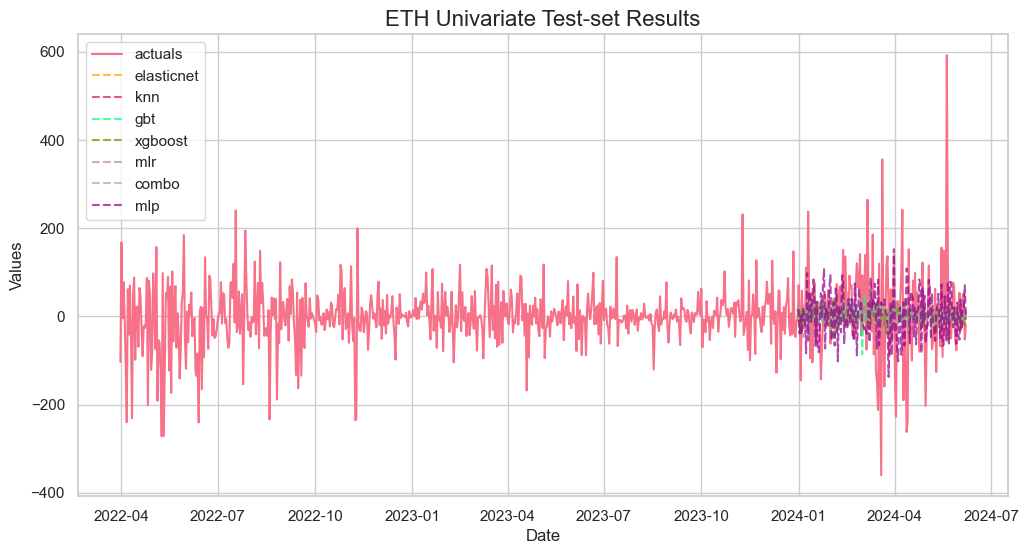

In [23]:
fETH.tune_test_forecast(models,feature_importance=True)
best_model_con_uni = fETH.order_fcsts()[0]
fETH.set_estimator('combo')
fETH.manual_forecast(how='weighted')
fETH.plot_test_set(order_by='TestSetRMSE')
plt.title('ETH Univariate Test-set Results',size=16)
plt.show()

PermutationExplainer explainer: 721it [00:19, 17.06it/s]                        
PermutationExplainer explainer: 721it [00:21, 15.54it/s]                        
PermutationExplainer explainer: 721it [03:11,  3.59it/s]                        
PermutationExplainer explainer: 721it [00:39, 13.23it/s]                        
PermutationExplainer explainer: 721it [00:46, 11.56it/s]                        
PermutationExplainer explainer: 721it [00:43, 12.42it/s]                        


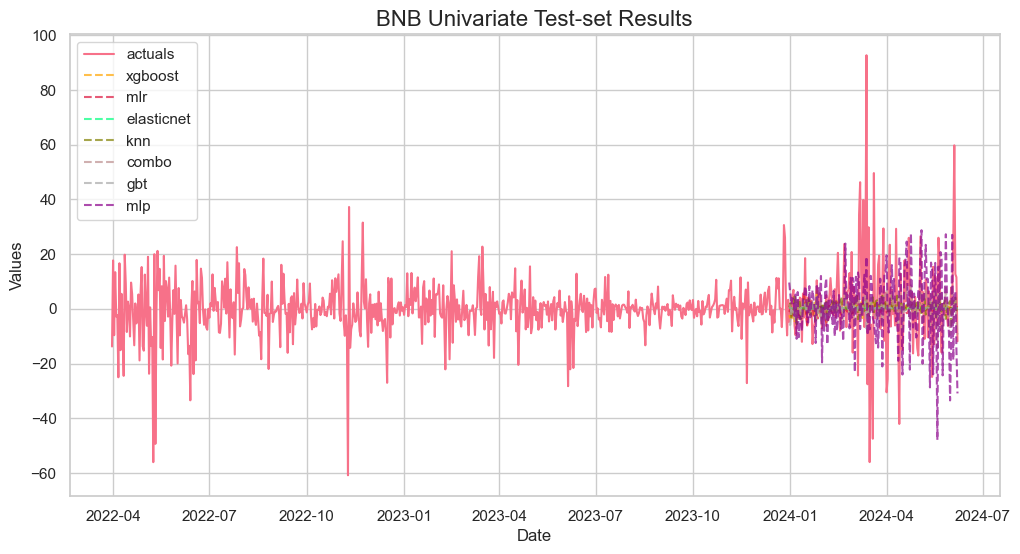

In [24]:
fBNB.tune_test_forecast(models,feature_importance=True)
best_model_con_uni = fBNB.order_fcsts()[0]
fBNB.set_estimator('combo')
fBNB.manual_forecast(how='weighted')
fBNB.plot_test_set(order_by='TestSetRMSE')
plt.title('BNB Univariate Test-set Results',size=16)
plt.show()

PermutationExplainer explainer: 641it [00:55,  9.38it/s]                        
PermutationExplainer explainer: 641it [00:54,  9.55it/s]                        
PermutationExplainer explainer: 641it [06:10,  1.68it/s]                        
PermutationExplainer explainer: 641it [02:29,  4.00it/s]                        
PermutationExplainer explainer: 641it [02:44,  3.67it/s]                        
PermutationExplainer explainer: 641it [02:09,  4.49it/s]                        


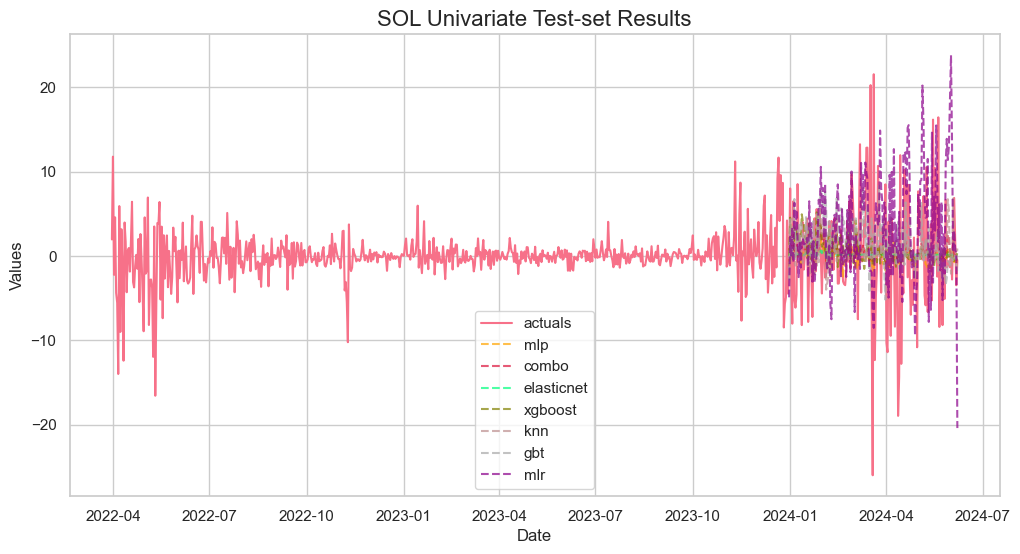

In [25]:
fSOL.tune_test_forecast(models,feature_importance=True)
best_model_con_uni = fSOL.order_fcsts()[0]
fSOL.set_estimator('combo')
fSOL.manual_forecast(how='weighted')
fSOL.plot_test_set(order_by='TestSetRMSE')
plt.title('SOL Univariate Test-set Results',size=16)
plt.show()

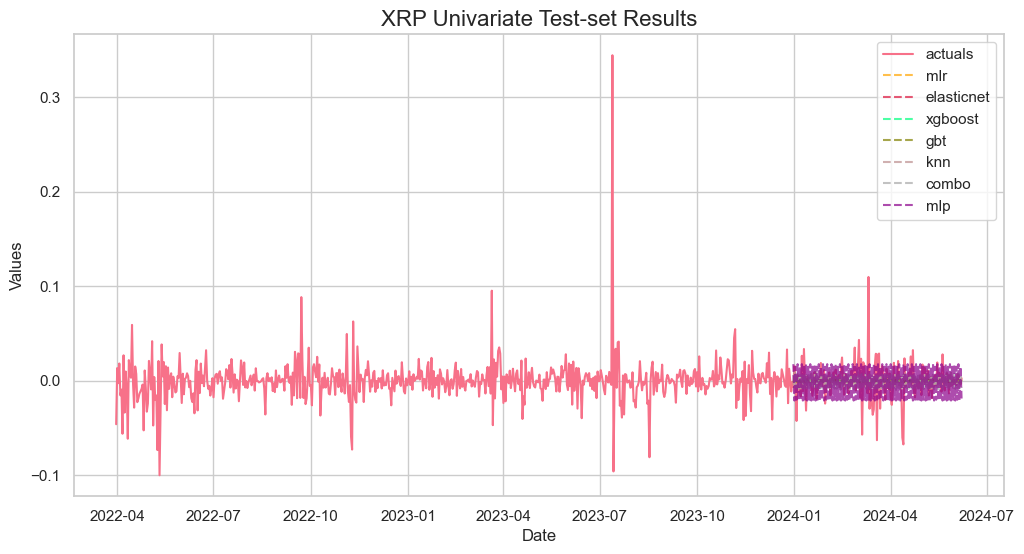

In [26]:
fXRP.tune_test_forecast(models,feature_importance=True)
best_model_con_uni = fXRP.order_fcsts()[0]
fXRP.set_estimator('combo')
fXRP.manual_forecast(how='weighted')
fXRP.plot_test_set(order_by='TestSetRMSE')
plt.title('XRP Univariate Test-set Results',size=16)
plt.show()

Se ve que el modelo mas precisio para las criptomonedas: BTC y ETH es gbt, BNB y XRP mrl y SOL knn. Por lo que revisaremos los resumenes de los modelos para tomar una decision que se ajuste correctamente a todas la cripto

In [27]:
pd.set_option('display.float_format',  '{:.4f}'.format)
ms = export_model_summaries({'BTC':fBTC,'BNB':fBNB,'SOL':fSOL,'ETH':fETH,
                             'XRP':fXRP}, determine_best_by='InSampleRMSE')

ms[
    [
        'ModelNickname',
        'Series',
        'TestSetRMSE',
        'TestSetR2',
        'InSampleRMSE',
        'InSampleR2',
        'best_model'
    ]
]

,ModelNickname,Series,TestSetRMSE,TestSetR2,InSampleRMSE,InSampleR2,best_model
0,xgboost,BTC,1795.9900,0.0049,0.9863,1.0000,True
1,mlp,BTC,2686.8501,-1.2270,73.1432,0.9950,False
2,combo,BTC,1888.0139,-0.0996,335.8979,0.8935,False
3,gbt,BTC,1796.1511,0.0048,702.3031,0.5345,False
4,knn,BTC,1874.2621,-0.0837,753.8718,0.4636,False
5,mlr,BTC,1804.3232,-0.0043,962.8858,0.1250,False
6,elasticnet,BTC,1804.3530,-0.0043,962.8861,0.1250,False
7,mlp,BNB,20.6191,-0.4917,0.0035,1.0000,True
8,xgboost,BNB,16.9230,-0.0048,0.6833,0.9957,False
9,combo,BNB,17.2172,-0.0401,4.0768,0.8485,False


Procedemos a predecir estos modelo de manera conjunta

In [28]:
mvf = MVForecaster(
    fBTC,fBNB,fSOL, fXRP,fETH,
    names=['BTC','BNB',"SOL","XRP","ETH"],
    test_length = .2,
    valiation_length = 4,
    cis = True,
    metrics = ['rmse','mape','mae','r2'],
) # init the mvf object
mvf

MVForecaster(
    DateStartActuals=2022-03-31T00:00:00.000000000
    DateEndActuals=2024-06-07T00:00:00.000000000
    Freq=D
    N_actuals=800
    N_series=5
    SeriesNames=['BTC', 'BNB', 'SOL', 'XRP', 'ETH']
    ForecastLength=52
    Xvars=['dayofyearsin', 'dayofyearcos', 'daysin', 'daycos', 'dayofweeksin', 'dayofweekcos', 'cycle4sin', 'cycle4cos']
    TestLength=160
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    OptimizeOn=mean
    GridsFile=MVGrids
)

In [29]:
mvf.corr()


,BTC,BNB,SOL,XRP,ETH
BTC,1.0000,0.6495,0.7090,0.5208,0.8263
BNB,0.6495,1.0000,0.5536,0.4437,0.6562
SOL,0.7090,0.5536,1.0000,0.4408,0.6703
XRP,0.5208,0.4437,0.4408,1.0000,0.5735
ETH,0.8263,0.6562,0.6703,0.5735,1.0000


selecionamos que se optimice con **BTC** que es la que queremos predecir

In [30]:
# how to optimize on one series
mvf.set_optimize_on('BTC')
# how to optimize using a weighted avarage
mvf.add_optimizer_func(lambda x: x[0]*.25 + x[1]*.75,'weighted')
mvf.set_optimize_on('weighted')
# how to optimize on the average of both/all series (default)
mvf.set_optimize_on('mean')

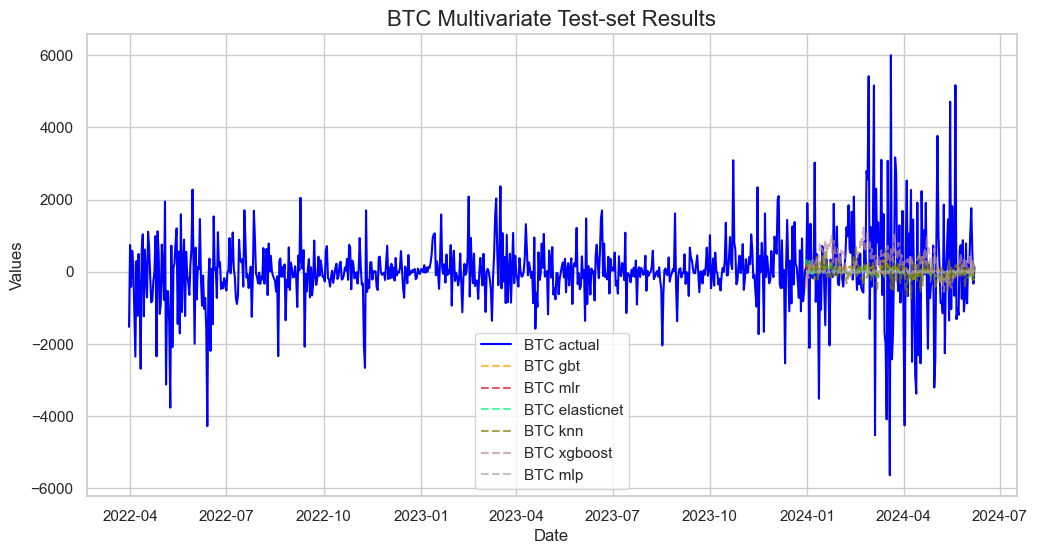

In [31]:
mvf.tune_test_forecast(models)
mvf.set_best_model(determine_best_by='TestSetRMSE')
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='BTC',put_best_on_top=True)
plt.title('BTC Multivariate Test-set Results',size=16)
plt.show()

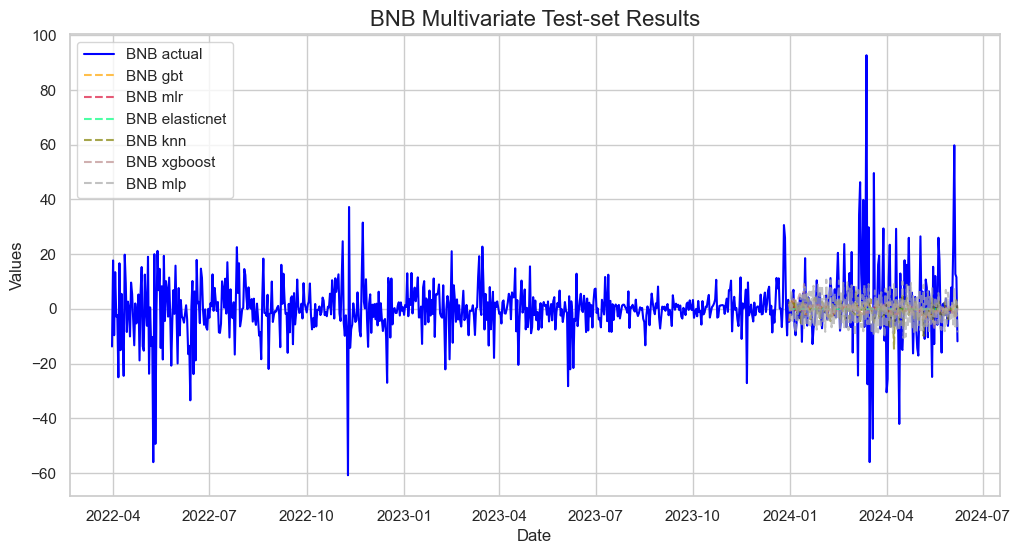

In [32]:
mvf.plot_test_set(series='BNB',put_best_on_top=True)
plt.title('BNB Multivariate Test-set Results',size=16)
plt.show()

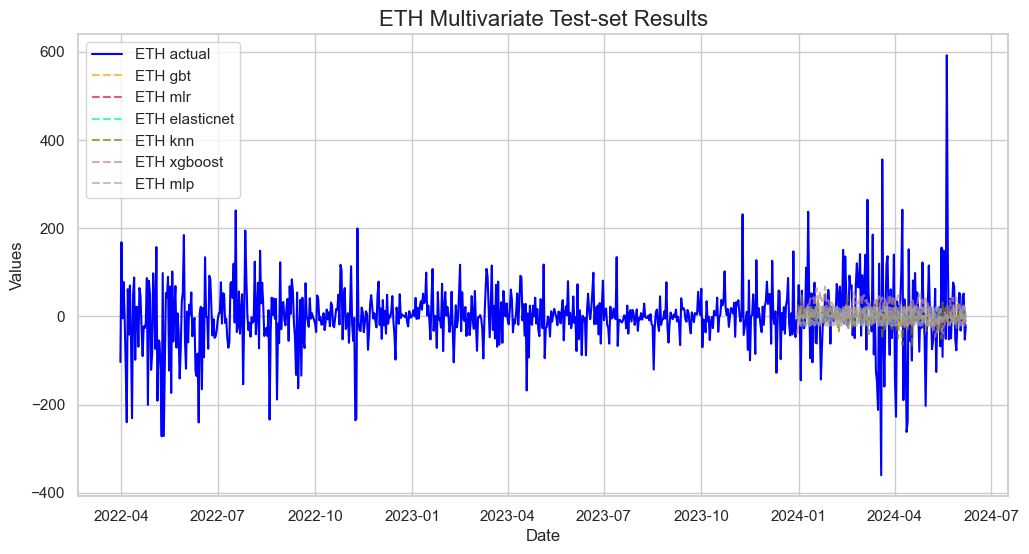

In [33]:
mvf.plot_test_set(series='ETH',put_best_on_top=True)
plt.title('ETH Multivariate Test-set Results',size=16)
plt.show()

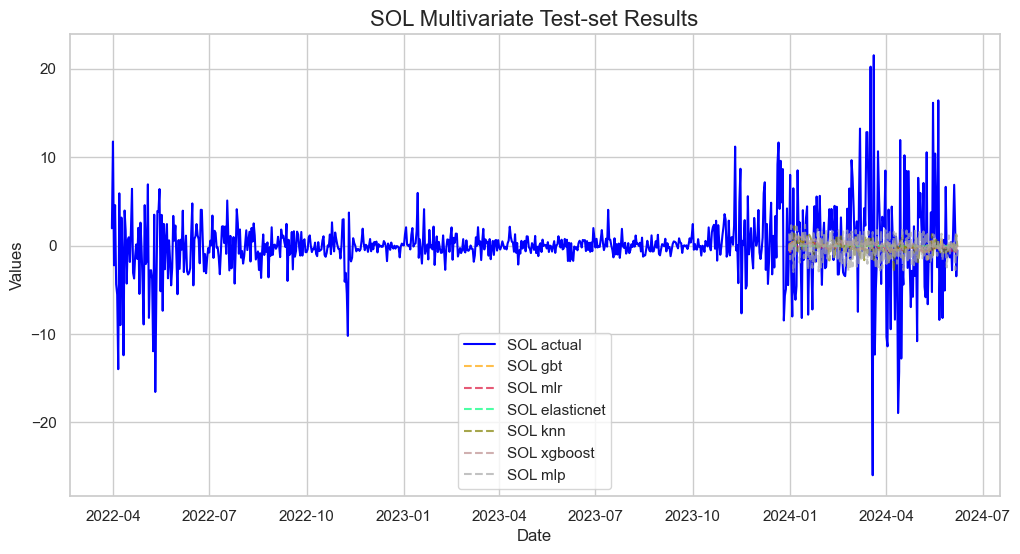

In [34]:
mvf.plot_test_set(series='SOL',put_best_on_top=True)
plt.title('SOL Multivariate Test-set Results',size=16)
plt.show()

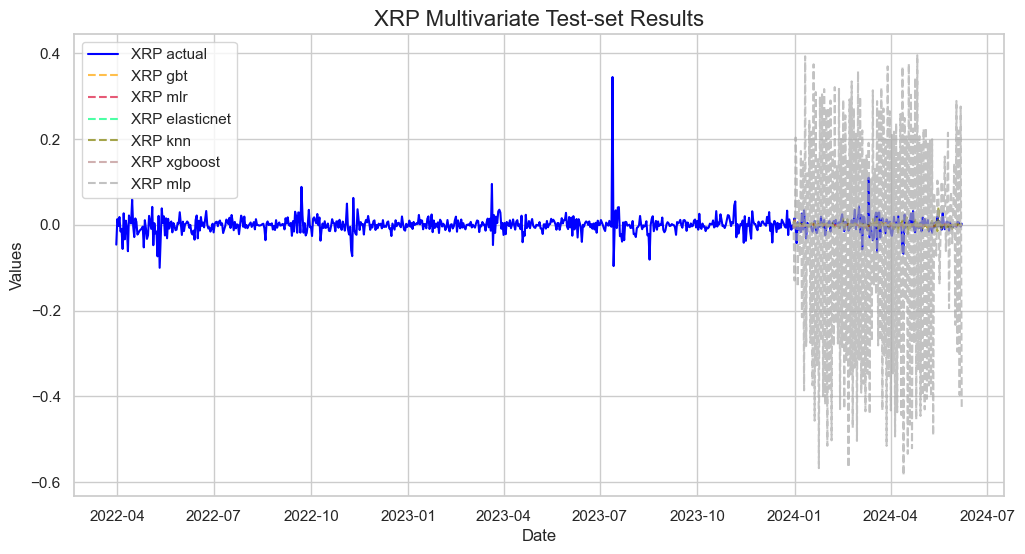

In [35]:
mvf.plot_test_set(series='XRP',put_best_on_top=True)
plt.title('XRP Multivariate Test-set Results',size=16)
plt.show()

El mejor modelo ya que optimizamos para BTC es MLR

In [36]:
results = mvf.export('model_summaries')
results

,Series,ModelNickname,Estimator,Xvars,HyperParams,Lags,Observations,DynamicallyTested,TestSetLength,ValidationMetric,...,MetricOptimized,best_model,InSampleRMSE,InSampleMAPE,InSampleMAE,InSampleR2,TestSetRMSE,TestSetMAPE,TestSetMAE,TestSetR2
0,BTC,gbt,gbt,"[dayofyearsin, dayofyearcos, daysin, daycos, d...","{'max_depth': 2, 'max_features': None}",1,800,True,160,rmse,...,TestSetRMSE,True,798.2083,2.8238,538.9753,0.4184,1806.6749,2.6986,1299.4857,-0.0069
1,BTC,mlr,mlr,"[dayofyearsin, dayofyearcos, daysin, daycos, d...",{'normalizer': None},3,800,True,160,rmse,...,TestSetRMSE,False,1019.1885,2.7278,647.3444,0.0534,1811.1712,1.9902,1297.8072,-0.0119
2,BTC,elasticnet,elasticnet,"[dayofyearsin, dayofyearcos, daysin, daycos, d...","{'alpha': 0.9, 'l1_ratio': 1, 'normalizer': 'm...",6,800,True,160,rmse,...,TestSetRMSE,False,1002.3565,2.9845,646.7059,0.0863,1812.6467,2.0010,1301.2032,-0.0136
3,BTC,knn,knn,"[dayofyearsin, dayofyearcos, daysin, daycos, d...",{'n_neighbors': 8},3,800,True,160,rmse,...,TestSetRMSE,False,957.2573,7.3495,633.4606,0.1650,1846.8442,2.8697,1310.5412,-0.0522
4,BTC,xgboost,xgboost,"[dayofyearsin, dayofyearcos, daysin, daycos, d...","{'n_estimators': 250, 'scale_pos_weight': 5, '...",3,800,True,160,rmse,...,TestSetRMSE,False,15.0126,0.1631,10.8936,0.9998,1833.5689,3.4113,1344.6629,-0.0371
5,BTC,mlp,mlp,"[dayofyearsin, dayofyearcos, daysin, daycos, d...","{'activation': 'tanh', 'hidden_layer_sizes': (...",3,800,True,160,rmse,...,TestSetRMSE,False,1040.2465,1.3237,640.9047,0.0139,1808.5578,1.2283,1287.4700,-0.0090
6,BNB,gbt,gbt,"[dayofyearsin, dayofyearcos, daysin, daycos, d...","{'max_depth': 2, 'max_features': None}",1,800,True,160,rmse,...,TestSetRMSE,True,8.4781,2.6498,5.6988,0.4089,17.1481,1.0774,11.0904,-0.0317
7,BNB,mlr,mlr,"[dayofyearsin, dayofyearcos, daysin, daycos, d...",{'normalizer': None},3,800,True,160,rmse,...,TestSetRMSE,False,10.7450,2.3073,6.7744,0.0491,17.1901,1.0677,11.0956,-0.0368
8,BNB,elasticnet,elasticnet,"[dayofyearsin, dayofyearcos, daysin, daycos, d...","{'alpha': 0.9, 'l1_ratio': 1, 'normalizer': 'm...",6,800,True,160,rmse,...,TestSetRMSE,False,11.0288,1.1811,6.8077,0.0000,17.0792,1.0284,11.0649,-0.0235
9,BNB,knn,knn,"[dayofyearsin, dayofyearcos, daysin, daycos, d...",{'n_neighbors': 8},3,800,True,160,rmse,...,TestSetRMSE,False,10.0521,3.3101,6.6304,0.1678,17.4372,1.4370,11.5335,-0.0668


procedemos a ensamblar el modelo

In [66]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
estimators = [
    (
        'mlr',
        LinearRegression()
    ),
    (
        'elasticnet',
        ElasticNet(
            **{
                k:v for k,v in (
                    results.loc[
                        results['ModelNickname'] == 'elasticnet',
                        'HyperParams',
                    ].values[0]
                ).items() if k != 'normalizer'
              }
        )
    ),
    (
        'mlp',
        MLPRegressor(
            **{
                k:v for k,v in (
                    results.loc[
                        results['ModelNickname'] == 'mlp',
                        'HyperParams',
                    ].values[0]
                ).items() if k != 'normalizer'
              }
        )
    )
]

final_estimator = KNeighborsRegressor(
    **{
        k:v for k,v in (
            results.loc[
                results['ModelNickname'] == 'knn',
                'HyperParams',
            ].values[0]
        ).items() if k != 'normalizer'
      }
)
mvf.add_sklearn_estimator(StackingRegressor,'stacking')
mvf.set_estimator('stacking')
mvf.manual_forecast(estimators=estimators,final_estimator=final_estimator,lags=13)

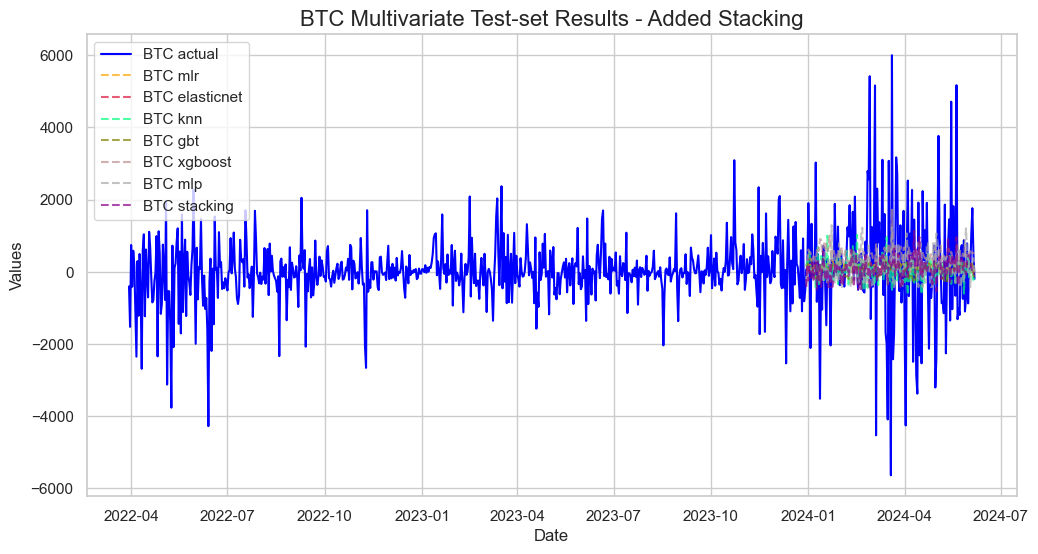

In [67]:
mvf.plot_test_set(series='BTC',put_best_on_top=True)
plt.title('BTC Multivariate Test-set Results - Added Stacking',size=16)
plt.show()

In [69]:
mvf.set_best_model(determine_best_by='TestSetRMSE')
results2 = mvf.export('model_summaries')
results2 = results2[
    [
        'ModelNickname',
        'Series',
        'TestSetRMSE',
        'TestSetR2',
        'InSampleRMSE',
        'InSampleR2',
        'Lags',
        'best_model'
    ]
]

results2

,ModelNickname,Series,TestSetRMSE,TestSetR2,InSampleRMSE,InSampleR2,Lags,best_model
0,mlr,BTC,1798.7759,0.0017,1023.0308,0.0472,1,True
1,elasticnet,BTC,1806.6365,-0.0071,1043.1575,0.0093,1,False
2,knn,BTC,1863.2880,-0.0712,889.1875,0.2796,3,False
3,gbt,BTC,1809.4686,-0.0102,830.8967,0.3715,1,False
4,xgboost,BTC,1814.9353,-0.0164,13.3607,0.9998,3,False
5,mlp,BTC,1826.8320,-0.0297,989.9329,0.1078,1,False
6,stacking,BTC,1808.3176,-0.0090,1075.1297,-0.0606,13,False
7,mlr,BNB,17.0427,-0.0248,10.8057,0.0397,1,True
8,elasticnet,BNB,17.0405,-0.0245,10.9870,0.0072,1,False
9,knn,BNB,17.4551,-0.0750,9.3656,0.2767,3,False


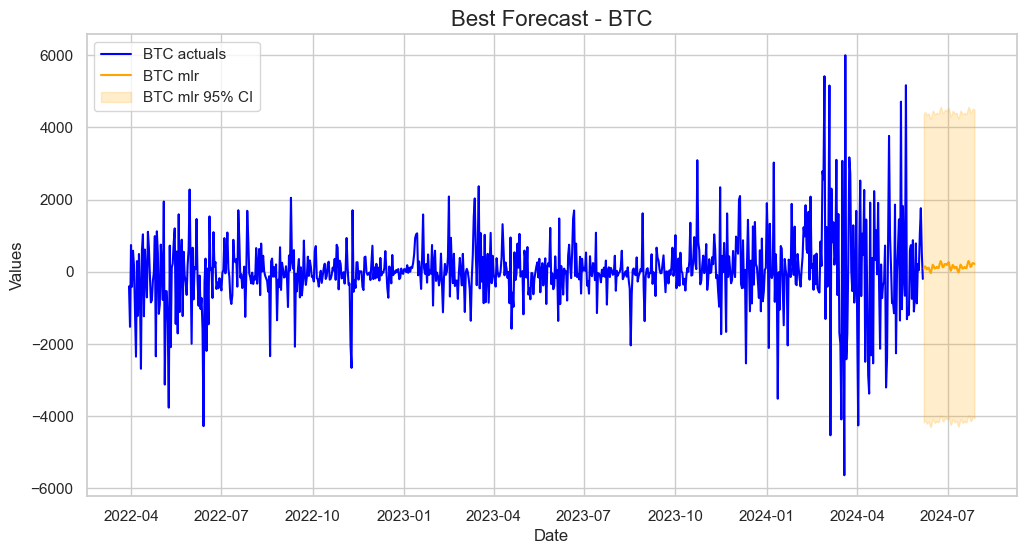

In [70]:
best_model_con = (
    results2.loc[results2['Series'] == 'BTC']
    .sort_values('TestSetR2',ascending=False)
    .iloc[0,0]
)
mvf.plot(series='BTC',models=best_model_con,ci=True)
plt.title('Best Forecast - BTC',size=16)
plt.show()

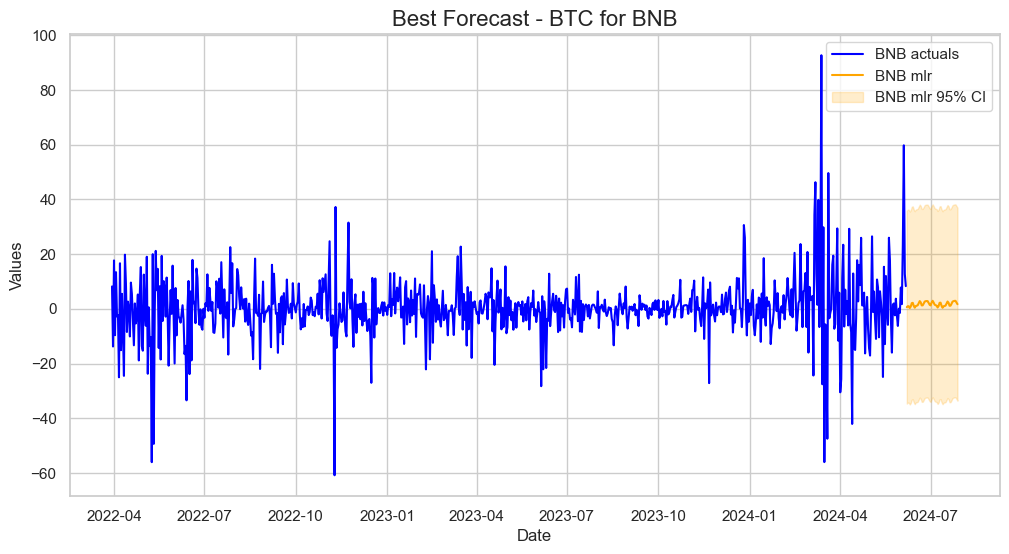

In [71]:
mvf.plot(series='BNB',models=best_model_con,ci=True)
plt.title('Best Forecast - BTC for BNB',size=16)
plt.show()

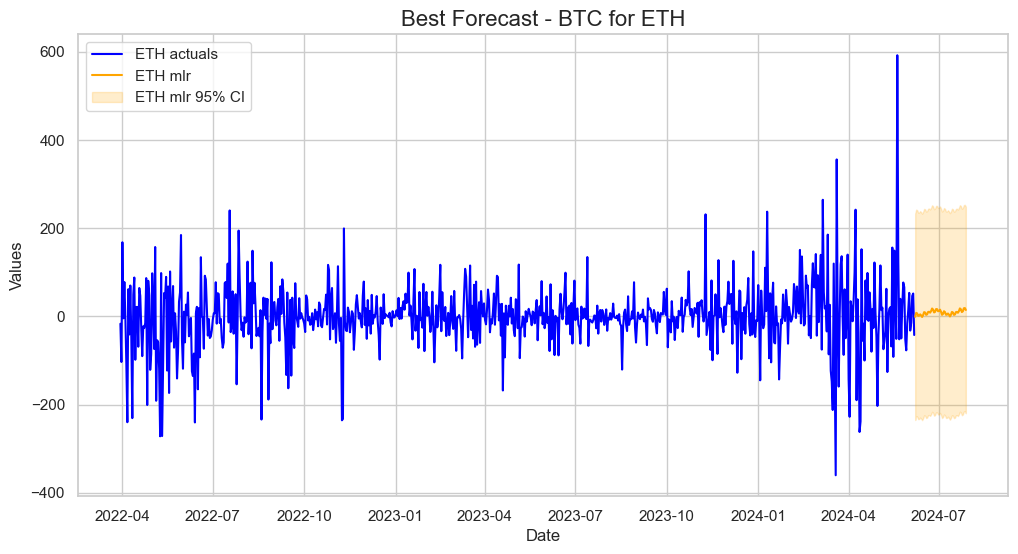

In [72]:
mvf.plot(series='ETH',models=best_model_con,ci=True)
plt.title('Best Forecast - BTC for ETH',size=16)
plt.show()

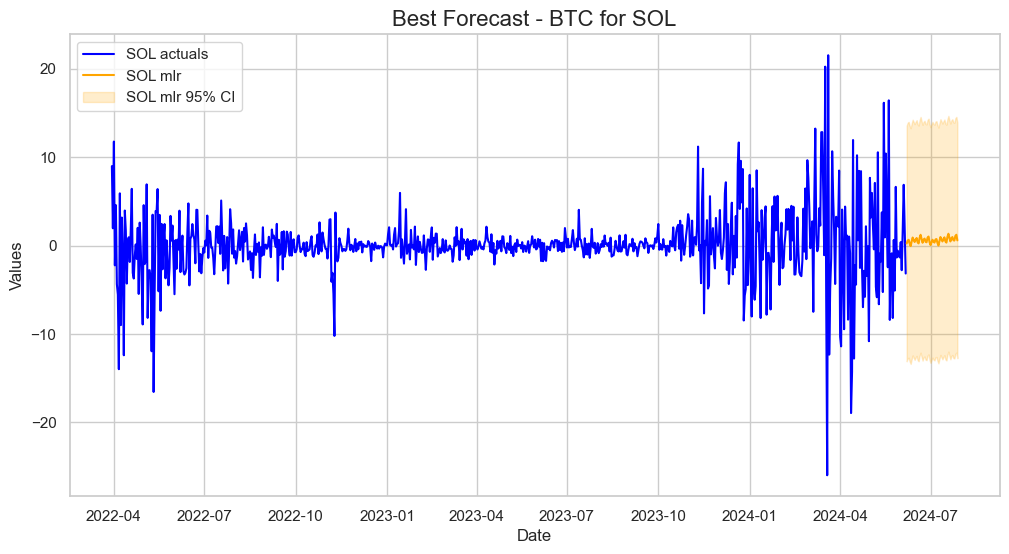

In [73]:
mvf.plot(series='SOL',models=best_model_con,ci=True)
plt.title('Best Forecast - BTC for SOL',size=16)
plt.show()

In [57]:
mvf.plot(series='XRP',models=best_model_con,ci=True)
plt.title('Best Forecast - BTC for XRP',size=16)
plt.show()

NameError: name 'mvf' is not defined

## ARIMA
**A**uto**R**egresion
**I**ntegrado convierte las series de tiempo en estacionarias.
**M**oving **A**verage modela el error como combinacion lineal de errores anteriores.

**ARIMA(p, d, q)**

**p** numero de lag observados

**d** numero de differenciones

**q** tamaño de la ventana del moving averege

Buscamos el numero de lags en nuestras series de tiempo.

In [66]:
# pmdarima Library
from pmdarima import ARIMA, auto_arima

# statsmodels Library
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast Library
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax, grid_search_sarimax
from sklearn.metrics import mean_absolute_error


In [30]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.show()
    
    return None

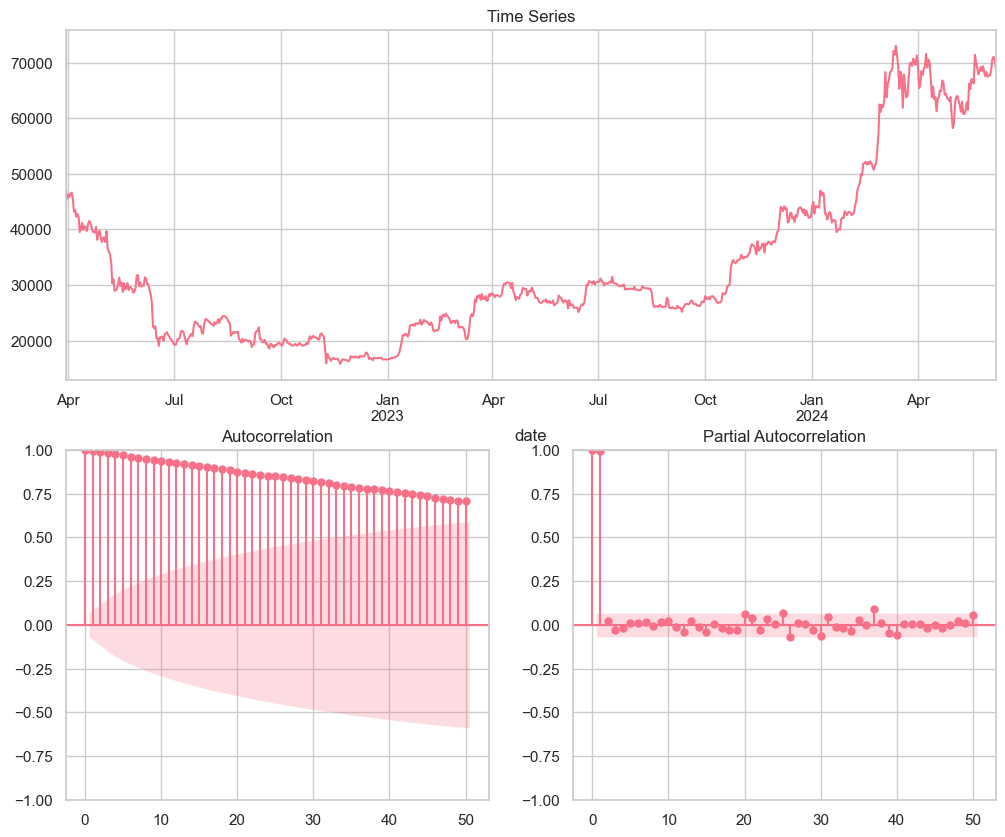

In [31]:
plotds(BTC_USD_df.close)

Para nuestra BTC le asignamos un p de 1 porque es el mas optimo segun la literatura y un q de 0 por la autocorrelacion parcial.

In [33]:
#BTC
n_train = len(BTC_USD_df.close); n_test = 28 
train_size = n_train - n_test

train_BTC = BTC_USD_df.close[:train_size]
dates_train = BTC_USD_df.index[:train_size]
test_4w_BTC = BTC_USD_df.close[train_size:train_size + n_test] 
dates_4w = BTC_USD_df.index[train_size:train_size + n_test] 

In [68]:
from statsmodels.tsa.arima.model import ARIMA


def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions,model_fit

test_4wBTC = test_4w_BTC.tolist()
yhat_BTC,model_BTC  = arima_rolling(train_BTC.tolist(), test_4wBTC)

predicted=60982.939541, expected=60793.710938
predicted=60793.632547, expected=61448.394531
predicted=61393.412973, expected=62901.449219
predicted=62780.500907, expected=61552.789062
predicted=61666.761920, expected=66267.492188
predicted=65850.760684, expected=65231.582031
predicted=65325.281944, expected=67051.875000
predicted=66885.051781, expected=66940.804688
predicted=66950.979428, expected=66278.367188
predicted=66339.027791, expected=71448.195312
predicted=70966.424834, expected=70136.531250
predicted=70262.586023, expected=69122.335938
predicted=69218.771832, expected=67929.562500
predicted=68041.905851, expected=68526.101562
predicted=68469.668370, expected=69265.945312
predicted=69196.182688, expected=68518.093750
predicted=68588.878116, expected=69394.554688
predicted=69311.230107, expected=68296.218750
predicted=68401.297291, expected=67578.093750
predicted=67646.368464, expected=68364.992188
predicted=68289.892379, expected=67491.414062
predicted=67575.167427, expected=6

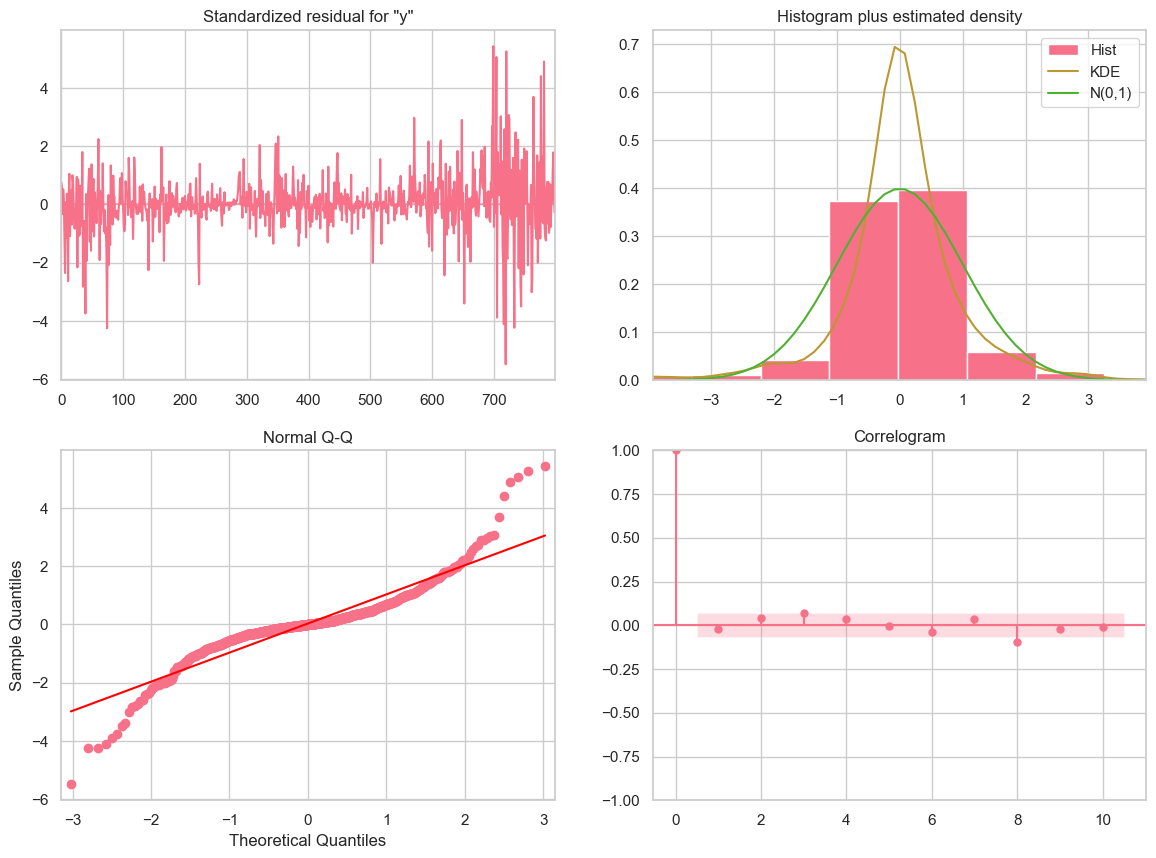

In [44]:
model_BTC.plot_diagnostics(figsize=(14,10));

Los residuos son normales y sin tendencia 

In [56]:
def forecast_accuracy(forecast, actual,model, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                          "AIC": [model.aic]},
                          index=[str_name])
    
    return df_acc
BTC=forecast_accuracy(np.array(test_4wBTC),np.array(yhat_BTC),model_BTC, "BTC")
BTC.head()

,MAE,MSE,MAPE,RMSE,AIC
BTC,1126.828446,2.570655e+06,0.016995,1603.326112,13373.779532


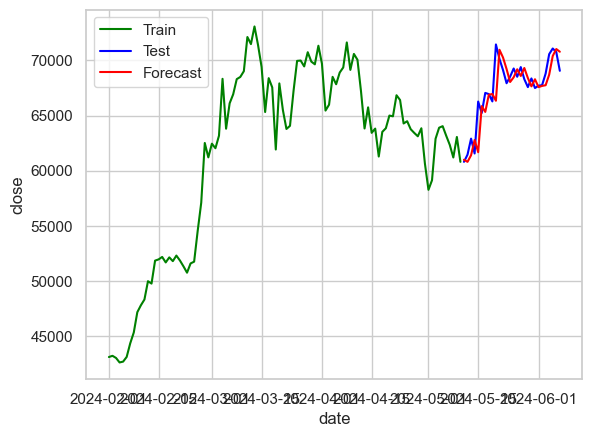

In [49]:
ax = sns.lineplot(x=dates_train[-100:], y=train_BTC[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wBTC, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_BTC, label="Forecast", color='r')
plt.show()

Nuestro error medio absoluto porcentual es de 1.6 % por lo que nuestro modelo perdice un 99.4%

## Sarimax 
Es una extension de arima con un componente de season,tiene el los mismo parametros que **(p,d,q)** y **m** qu es el componente season.

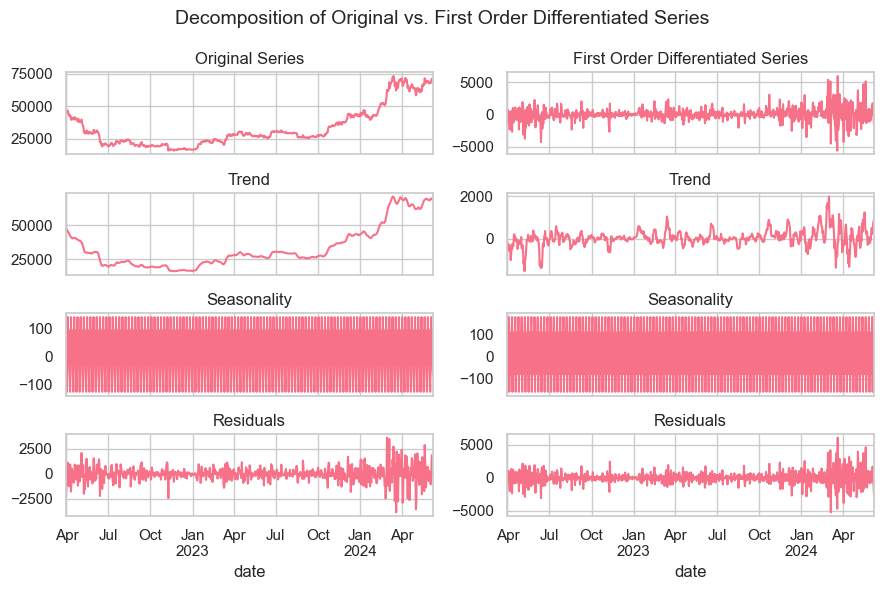

In [60]:
# Decomposing the Original and First Order Differentiated Series
res_decompose = seasonal_decompose(BTC_USD_df["close"], model='additive', extrapolate_trend='freq')
res_decompose_diff_1 = seasonal_decompose(BTC_USD_df["diff"], model='additive', extrapolate_trend='freq')

# Plotting the Decomposition Results
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(9, 6), sharex=True)

# Original Series Decomposition
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Original Series')
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Trend')
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Seasonality')
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuals')

# First Order Differentiated Series Decomposition
res_decompose_diff_1.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('First Order Differentiated Series')
res_decompose_diff_1.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Trend')
res_decompose_diff_1.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Seasonality')
res_decompose_diff_1.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuals')

fig.suptitle('Decomposition of Original vs. First Order Differentiated Series', fontsize=14)
fig.tight_layout();

Ya que hay ruido en estacionalidad lo vamos estimar anualmente para ver si se observa un cambio.

In [72]:
from statsmodels.tsa.arima.model import ARIMA


def sarima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions, model 
test_4wBTC = test_4w_BTC.tolist()
yhat_BTC,smodel_BTC  = sarima_rolling(train_BTC.tolist(), test_4wBTC)

predicted=60647.945140, expected=60793.710938
predicted=59443.979903, expected=61448.394531
predicted=59788.087115, expected=62901.449219
predicted=63528.630970, expected=61552.789062
predicted=64236.244961, expected=66267.492188
predicted=67301.906559, expected=65231.582031
predicted=65471.826142, expected=67051.875000
predicted=65492.747305, expected=66940.804688
predicted=66322.554299, expected=66278.367188
predicted=65305.169464, expected=71448.195312
predicted=71745.098781, expected=70136.531250
predicted=68888.595150, expected=69122.335938
predicted=69305.014159, expected=67929.562500
predicted=67420.919753, expected=68526.101562
predicted=68458.486913, expected=69265.945312
predicted=68607.590573, expected=68518.093750
predicted=72924.966376, expected=69394.554688
predicted=69543.001100, expected=68296.218750
predicted=69632.679897, expected=67578.093750
predicted=67458.237510, expected=68364.992188
predicted=67491.181158, expected=67491.414062
predicted=70474.420446, expected=6

In [74]:
def forecast_accuracy(forecast, actual,model, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse]},
                          index=[str_name])
    
    return df_acc
BTCs=forecast_accuracy(np.array(test_4wBTC),np.array(yhat_BTC),smodel_BTC, "Sarima BTC")
BTCs.head()

,MAE,MSE,MAPE,RMSE
Sarima BTC,1581.1849,4.243592e+06,0.023694,2059.997981


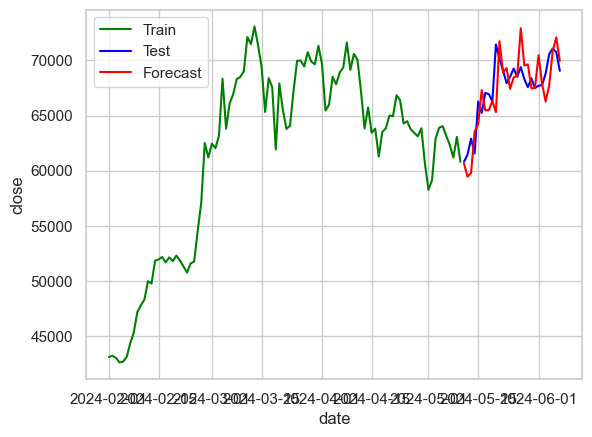

In [75]:
ax = sns.lineplot(x=dates_train[-100:], y=train_BTC[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wBTC, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_BTC, label="Forecast", color='r')
plt.show()

Nuestro error medio absoluto porcentual es de 2.3 % por lo que nuestro modelo perdice un 98.7%

In [76]:
def sarima_rolling4 (history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order=(1, 1, 0), seasonal_order=(1, 1, 0, 4))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions, model 
test_4wBTC = test_4w_BTC.tolist()
yhat_BTC,smodel_BTC  = sarima_rolling4(train_BTC.tolist(), test_4wBTC)

predicted=61423.969734, expected=60793.710938
predicted=60286.424734, expected=61448.394531
predicted=62717.254833, expected=62901.449219
predicted=61025.381124, expected=61552.789062
predicted=61273.678981, expected=66267.492188
predicted=65971.206906, expected=65231.582031
predicted=66909.311827, expected=67051.875000
predicted=65427.109175, expected=66940.804688
predicted=70209.614007, expected=66278.367188
predicted=66109.733259, expected=71448.195312
predicted=72568.234873, expected=70136.531250
predicted=70025.050766, expected=69122.335938
predicted=69995.696586, expected=67929.562500
predicted=71588.918444, expected=68526.101562
predicted=68382.031266, expected=69265.945312
predicted=68374.525920, expected=68518.093750
predicted=67470.371008, expected=69394.554688
predicted=71052.724635, expected=68296.218750
predicted=68793.276270, expected=67578.093750
predicted=66851.943199, expected=68364.992188
predicted=68475.839453, expected=67491.414062
predicted=67004.957151, expected=6

In [77]:
BTCs=forecast_accuracy(np.array(test_4wBTC),np.array(yhat_BTC),smodel_BTC, "Sarima BTC")
BTCs.head()

,MAE,MSE,MAPE,RMSE
Sarima BTC,1601.33303,4.474401e+06,0.023701,2115.277948


La prediccion no cambia el procentaje de prediccion cuando se cambia de annual por trimestral lo que nos quedamos con el modelo arima con roling.